In [1]:
# importing Libraries

# for Data Analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset -- PLEASE NOTE THE ENCODING WHEN LOADING THE DATASET
df = pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\OPTIMUS AI - HACKATHON\investments_VC.csv", encoding='latin1')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',
        'funding received from angel investors','funding from grants','funding from private equity',
        'funding from equity dilution after IPO','funding from debts after IPO','funding from secondary markets',
        'funding from crowdfunding','round A funding','round B funding','round C funding','round D funding','round E funding',
       'round F funding']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details


,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


In [4]:
#deleting duplicate rows.
df = df.drop_duplicates()
print(df.shape)

(49439, 39)


In [5]:
# drop missing values
df = df.dropna()

In [6]:
#cleaning the dataframe by dropping uneccessary columns
df = df.drop(['permalink', 'homepage_url'], axis=1)

#Removing the row with no 'name'
df.dropna(how='any', subset=['name'], axis=0, inplace=True)

#Extracting year value from "first_funding_at" and changing to int
df['first_funding_at'] = df.first_funding_at.str.split("-").str[0]
df['first_funding_at'] = df['first_funding_at'].astype(int)

#Extracting year value from "last_funding_at" and changing to int
df['last_funding_at'] = df.last_funding_at.str.split("-").str[0]
df['last_funding_at'] = df['last_funding_at'].astype(int)

#Changing the values in column "funding_total_usd" from string to float
df[' funding_total_usd '] = df[' funding_total_usd '].str.strip().str.replace(",","")
df[' funding_total_usd '] = df[' funding_total_usd '].replace("-",0).astype("float")

#Replacing missing status with "unknown"
df['status'] = df['status'].replace(np.nan,"unknown")
print(df.shape)
df.head()

(21840, 37)


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,004 Technologies,|Software|,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1-800-DENTIST,|Health and Wellness|,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1-800-DOCTORS,|Health and Wellness|,Health and Wellness,1750000.0,operating,USA,NJ,Newark,Iselin,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,10-20 Media,|E-Commerce|,E-Commerce,2050000.0,operating,USA,MD,Baltimore,Woodbine,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Checking any funding before 1902 so as to eliminate false entries
print(df[df['first_funding_at']<1902][['name', 'founded_at', 'first_funding_at']])
df.drop(df[df['first_funding_at']<1902].index, inplace=True)
df.shape

                            name  founded_at  first_funding_at
37313  SecureNet Payment Systems  1997-01-01                11


(21839, 37)

In [8]:
df2 = df.copy()

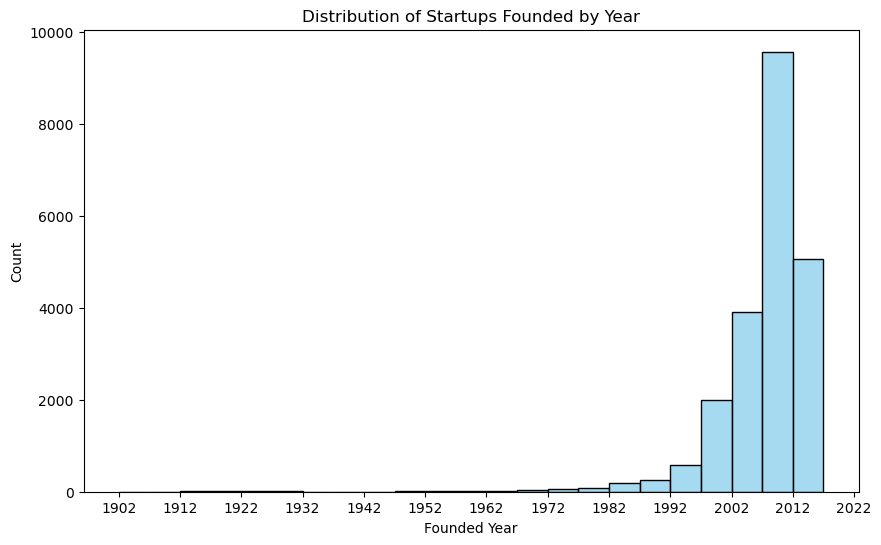

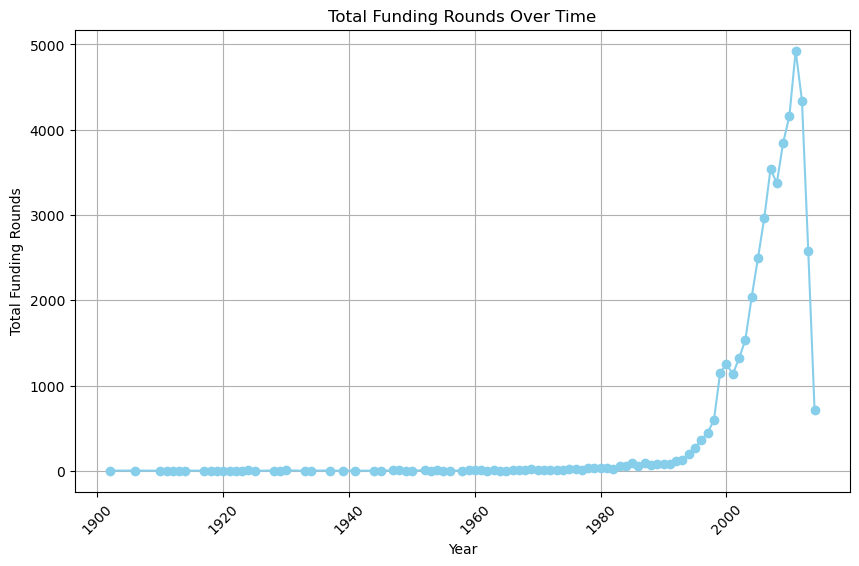

In [9]:
# Drop missing or non-numeric values in the 'founded_year' column
df_cleaned = df.dropna(subset=['founded_year'])
df_cleaned['founded_year'] = df_cleaned['founded_year'].astype(int)  # Convert to integer type if needed

# Plotting the distribution of startups founded by year
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['founded_year'], bins=range(df_cleaned['founded_year'].min(), df_cleaned['founded_year'].max() + 5, 5), kde=False, color='skyblue', edgecolor='black')

# Setting x-axis ticks in multiples of 20 years
plt.xticks(range(df_cleaned['founded_year'].min(), df_cleaned['founded_year'].max() + 10, 10))

plt.title('Distribution of Startups Founded by Year')
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.show()

# Distribution of funding rounds by year
plt.figure(figsize=(10, 6))
df.groupby('founded_year')['funding_rounds'].sum().plot(kind='line', marker='o', color='skyblue')
plt.title('Total Funding Rounds Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Rounds')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
# dropping redundant features from the dataset
df2.drop(columns=['name', 'category_list', 'state_code', 'region', 'founded_month', 'founded_quarter', 'founded_at'], inplace=True)


In [11]:
# Create a new column 'target' based on the condition
df2['target'] = df2['status'].apply(lambda x: 1 if x == 'closed' else 0)

# Display the updated DataFrame
#df2.head()


In [12]:
# dropping status column
df2.drop(columns=['status'], inplace=True)

In [13]:
# segment data
label = df2.pop('target')

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df2[' market '] = label_encoder.fit_transform(df2[' market '])
df2['country_code'] = label_encoder.fit_transform(df2['country_code'])
df2['city'] = label_encoder.fit_transform(df2['city'])

# Display the encoded DataFrame
#df2.head()


In [15]:
# plotting a feature importance chart to Identify key features from the data set
scaler = MinMaxScaler()
test_scaled = scaler.fit_transform(df2,label)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampling ratio ( undersample majority class to be 5 times the size of minority class)
under_sample = RandomUnderSampler(sampling_strategy={0: 5 * label.value_counts()[1]})

# Undersample the data
test_resampled, test_label_resampled = under_sample.fit_resample(test_scaled, label)

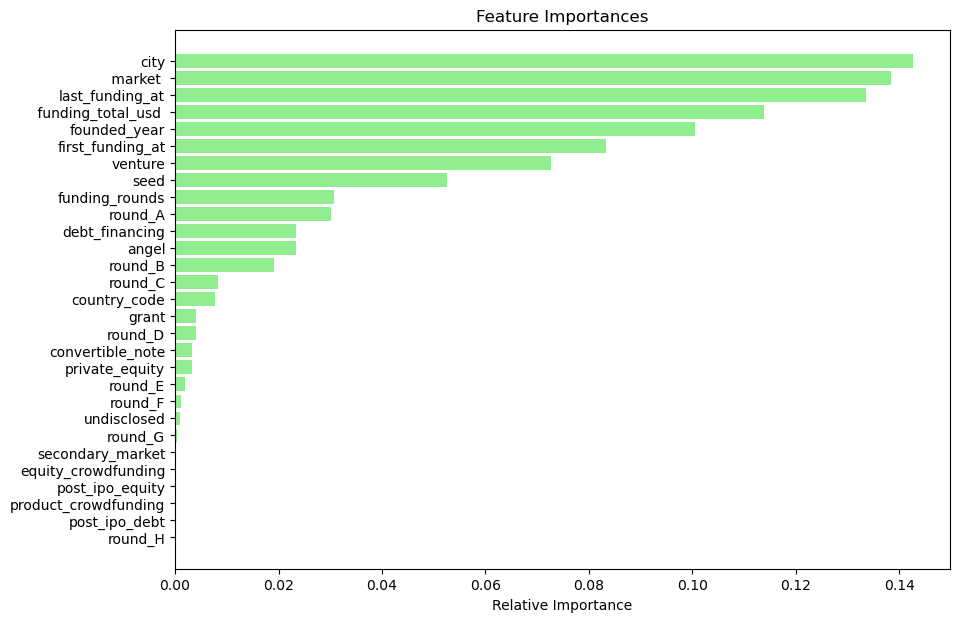

In [17]:
# fit the model
model = RandomForestClassifier()
model.fit(test_resampled, test_label_resampled)
feature_names = list(df2.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [18]:
#dropping features of relatively low importance
df3 = df2.drop(columns=['secondary_market', 'round_G', 'equity_crowdfunding', 'post_ipo_equity', 'product_crowdfunding', 'post_ipo_debt', 'round_H'])


In [24]:
#standardization of features using Standard Scaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df2),columns= df2.columns)
scaled_df

,market,funding_total_usd,country_code,city,funding_rounds,founded_year,first_funding_at,last_funding_at,seed,venture,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,0.536187,-0.073515,0.216406,0.238496,-0.657830,0.666048,0.485817,0.082907,1.296614,-0.311962,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
1,1.302068,-0.081541,0.216406,-1.360436,-0.657830,0.406152,1.159923,0.867063,-0.252214,-0.311962,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
2,-0.168011,-0.081541,0.216406,-0.157058,-0.657830,-2.712590,-0.188289,-0.701248,-0.252214,-0.311962,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
3,-0.168011,-0.073515,0.216406,-0.461617,-0.657830,-2.972485,0.148764,-0.309170,-0.252214,-0.311962,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
4,-0.661464,-0.072139,0.216406,1.609010,1.238301,-0.763376,-0.525342,-0.309170,-0.252214,-0.311962,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21834,0.741793,-0.021918,0.216406,0.641479,-0.657830,0.925943,1.159923,0.867063,-0.252214,0.068854,...,-0.013043,-0.016462,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
21835,1.471692,3.892785,0.216406,0.866184,4.398520,0.016310,-1.199448,-0.309170,-0.252214,25.072388,...,-0.013043,-0.016462,2.310067,36.308465,49.344936,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
21836,-1.314261,0.033119,0.216406,-0.779175,-0.657830,0.146257,-0.188289,-0.701248,-0.252214,0.420377,...,-0.013043,-0.016462,4.031258,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767
21837,-1.314261,0.075657,0.216406,-0.794031,1.238301,-1.153219,-0.188289,0.867063,-0.252214,0.472374,...,-0.013043,-0.016462,-0.282936,1.006185,-0.190067,-0.09177,-0.085215,-0.032902,-0.016634,-0.006767


In [25]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampling ratio ( undersample majority class to be 5 times the size of minority class)
under_sample = RandomUnderSampler(sampling_strategy={0: 5 * label.value_counts()[1]})

# Undersample the data
test1_resampled, test1_label_resampled = under_sample.fit_resample(scaled_df, label)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(test_resampled, test_label_resampled, test_size=0.3, random_state= 1)

In [27]:
# Instantiate Logistic Regression model
# Define class weights ( weight for minority class is 3 times higher)
class_weight = {0: 1, 1: 8}
log_reg = LogisticRegression(class_weight=class_weight)
# Train model
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [28]:
# Model Prediction file
log_pred = log_reg.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.6802054154995332
Precision: 0.3248407643312102
Recall: 0.8619718309859155
F1-score: 0.47185813415574407
AUC-ROC: 0.7530340408427059


In [30]:
# Applying 8 machine learning algorithms to the dataset and Evaluating their perfromance

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state= 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


# Fitting and Evaluating the algorithms
accuracy_list= {}
precision_list= {}
recall_list= {}
roc_list= {}

for classifier in classifiers:
    model= classifier[0]
    model.fit(x_train, y_train)
    model_name= classifier[1]
    
    pred= model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    accuracy_list[model_name]= ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name]= ([str(round(p_score*100,2))+ '%'])
    recall_list[model_name]= ([str(round(r_score*100,2))+ '%'])
    roc_list[model_name]= ([str(round(roc_score*100,2))+ '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

In [31]:
print('Accuracy score')
s1= pd.DataFrame(accuracy_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.7%,82.77%,81.84%,83.33%,83.43%,22.5%,78.2%,82.91%


In [32]:
print('Precision score')
s2= pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,41.4%,45.78%,42.34%,0.0%,0.0%,17.33%,34.78%,17.65%


In [33]:
print('recall score')
s3= pd.DataFrame(recall_list)
s3.head()

recall score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,25.07%,21.41%,26.48%,0.0%,0.0%,97.46%,36.06%,0.85%
